In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from backtester import backtester
from strat import *
import math

In [2]:
data = pd.read_csv("data.csv")

ticker_dict_train = {}
ticker_dict_test = {}
ticker_dict_oos = {}
ticker_dict = {}

In [3]:
for ticker in data.ticker.unique():
        data_tmp = data.loc[data["ticker"] == ticker]
        data_tmp['ret'] = data_tmp['last'].pct_change()
        data_tmp['log_ret'] = np.log(data_tmp['last']) - np.log(data['last'].shift(1))
        data_tmp['signal'] = data_tmp['log_ret']
        data_tmp = data_tmp.set_index('date')
        ticker_dict_train[ticker] = data_tmp.iloc[:1500,:]
        ticker_dict_test[ticker] = data_tmp.iloc[1500 - 10:,:]
        ticker_dict[ticker] = data_tmp

<ipython-input-3-c60bbdae12aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tmp['ret'] = data_tmp['last'].pct_change()
<ipython-input-3-c60bbdae12aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tmp['log_ret'] = np.log(data_tmp['last']) - np.log(data['last'].shift(1))
<ipython-input-3-c60bbdae12aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [4]:
uni_date = sorted(data.date.unique())
data_logret = pd.DataFrame(index = uni_date)

In [5]:
for ticker in data.ticker.unique():
    data_logret[ticker] = ticker_dict[ticker]['log_ret']

In [6]:
MA_results_train = {}
for ticker in ticker_dict_train:
    train = ticker_dict_train[ticker]
    x = MA(train, "signal", "pos", "log_ret", 0, window=3, thre=1.2, window_std = 10, MM=True)
    position = pd.DataFrame(index = data_logret.iloc[:1500].index)
    position[ticker] = x['pos']
    backtest = backtester(ticker, data_logret.iloc[:1500], position)
    MA_results_train[ticker] = backtest.cal_sharpe()

C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept

C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept

C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept

C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\backtester.py:23: RuntimeWarning: invalid value encountered in double_scalars
  return mean/sigma
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = 

C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept

C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept

C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept

C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept

C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept

C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept

C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()
C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept

In [7]:
df_MA_results_train = pd.DataFrame.from_dict(MA_results_train, orient='index')
df_MA_results_train.columns = ['sharpe']
df_MA_results_train.dropna(inplace = True, axis = 0)
df_MA_results_train.sort_values(by = ['sharpe'], ascending = False)
df_MA_test = df_MA_results_train.loc[df_MA_results_train['sharpe'] > 1].index

In [8]:
position = pd.DataFrame(index = data_logret.iloc[1500:].index)
for ticker in df_MA_test:
    train = ticker_dict_test[ticker]
    x = MA(train, "signal", "pos", "log_ret", 0, window=3, thre=1.2, window_std = 10, MM=True)

    position[ticker] = x['pos']
backtest = backtester(list(df_MA_test), data_logret.iloc[1500:], position)

C:\Users\user\OneDrive\Documents\Y-Intercept\Y-Intercept\strat.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MA"] = data[signal_name].rolling(window=window).mean()/data[signal_name].rolling(window=window_std).std()


In [9]:
backtest.cal_sharpe()

1.2956528621364807

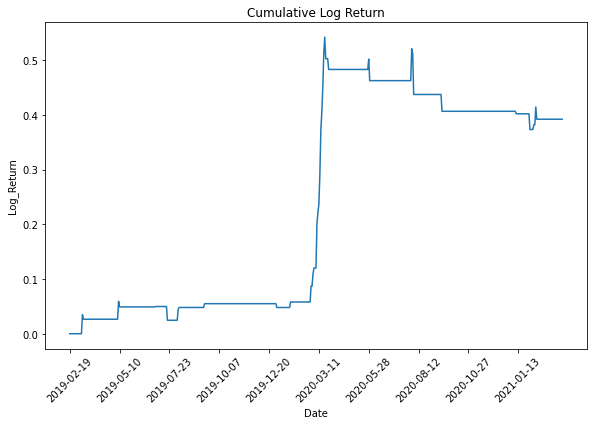

In [10]:
backtest.plot_cum_lr()